In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # type: ignore
import os

In [ ]:
df = pd.read_csv(os.path.join(
    "SimpleModelRandomSearch" , "weatherAUS.csv"
))
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
df.isnull().sum()[df.isnull().sum() > 0]

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

In [4]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [5]:
numerical_cols = df.select_dtypes(include=np.number).columns
categorical_cols = df.select_dtypes(include='object').columns

for col in categorical_cols:
    print("====",col,"====")
    print("  ",df[col].unique())
    print("  Count:",df[col].nunique())



==== Date ====
   ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
  Count: 3436
==== Location ====
   ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
  Count: 49
==== WindGustDir ====
   ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' nan 'ENE' 'SSE' 'S' 'NW' 'SE'
 'ESE' 'E' 'SSW']
  Count: 16
==== WindDir9am ====
   ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
  Count: 16
==== WindDir3

In [6]:
df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))

***
### **How to get rid of these null values?**

In [7]:
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())
for col in categorical_cols:
    if col != 'RainTomorrow':
        df[col] = df[col].fillna(df[col].mode()[0])
        
rowsBefore = df.shape[0]
print(rowsBefore)

145460


In [8]:
df = df.dropna()
print(f"Rows lost: {rowsBefore - df.shape[0]}, ~ {round((rowsBefore - df.shape[0]) / rowsBefore * 100, 4)}%")
print(df.shape[0])

Rows lost: 3267, ~ 2.246%
142193


In [9]:
df.isnull().sum()[df.isnull().sum() > 0]

Series([], dtype: int64)

***
Ignoring the problem:
### **Encoding Data**

In [10]:
le = LabelEncoder()
df.loc[:, "Location"] = le.fit_transform(df["Location"]) #type:ignore
df.loc[:, "RainToday"] = le.fit_transform(df["RainToday"]) #type:ignore
df.loc[:, "RainTomorrow"] = le.fit_transform(df["RainTomorrow"]) #type:ignore
df.loc[:, "WindGustDir"] = le.fit_transform(df["WindGustDir"]) #type:ignore
df.loc[:, "WindGustSpeed"] = le.fit_transform(df["WindGustSpeed"]) #type:ignore
df.loc[:, "WindDir9am"] = le.fit_transform(df["WindDir9am"]) #type:ignore
df.loc[:, "WindDir3pm"] = le.fit_transform(df["WindDir3pm"]) #type:ignore

In [11]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,1228089600000000000,2,13.4,22.9,0.6,4.8,8.4,13,21.0,13,...,71.0,22.0,1007.7,1007.1,8.0,5.0,16.9,21.8,0,0
1,1228176000000000000,2,7.4,25.1,0.0,4.8,8.4,14,21.0,6,...,44.0,25.0,1010.6,1007.8,5.0,5.0,17.2,24.3,0,0
2,1228262400000000000,2,12.9,25.7,0.0,4.8,8.4,15,22.0,13,...,38.0,30.0,1007.6,1008.7,5.0,2.0,21.0,23.2,0,0
3,1228348800000000000,2,9.2,28.0,0.0,4.8,8.4,4,10.0,9,...,45.0,16.0,1017.6,1012.8,5.0,5.0,18.1,26.5,0,0
4,1228435200000000000,2,17.5,32.3,1.0,4.8,8.4,13,19.0,1,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,1497916800000000000,41,3.5,21.8,0.0,4.8,8.4,0,14.0,2,...,59.0,27.0,1024.7,1021.2,5.0,5.0,9.4,20.9,0,0
145455,1498003200000000000,41,2.8,23.4,0.0,4.8,8.4,0,14.0,9,...,51.0,24.0,1024.6,1020.3,5.0,5.0,10.1,22.4,0,0
145456,1498089600000000000,41,3.6,25.3,0.0,4.8,8.4,6,9.0,9,...,56.0,21.0,1023.5,1019.1,5.0,5.0,10.9,24.5,0,0
145457,1498176000000000000,41,5.4,26.9,0.0,4.8,8.4,3,17.0,9,...,53.0,24.0,1021.0,1016.8,5.0,5.0,12.5,26.1,0,0


***
### Split data

In [12]:
X = df.drop('RainTomorrow', axis=1)
y = df['RainTomorrow']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

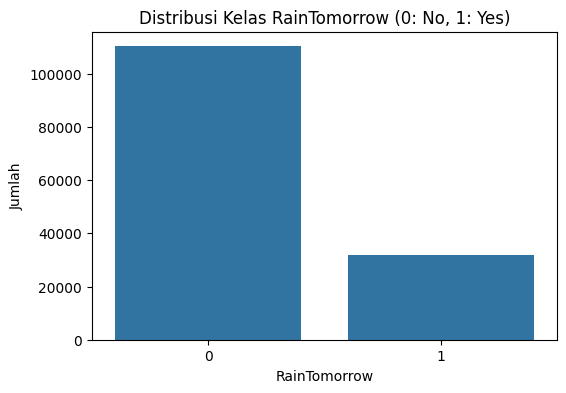

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribusi Kelas RainTomorrow (0: No, 1: Yes)')
plt.xlabel('RainTomorrow')
plt.ylabel('Jumlah')
plt.show()

In [15]:
# TODO: SMOTE
# smote=SMOTE() 


In [16]:
X.shape

(142193, 22)

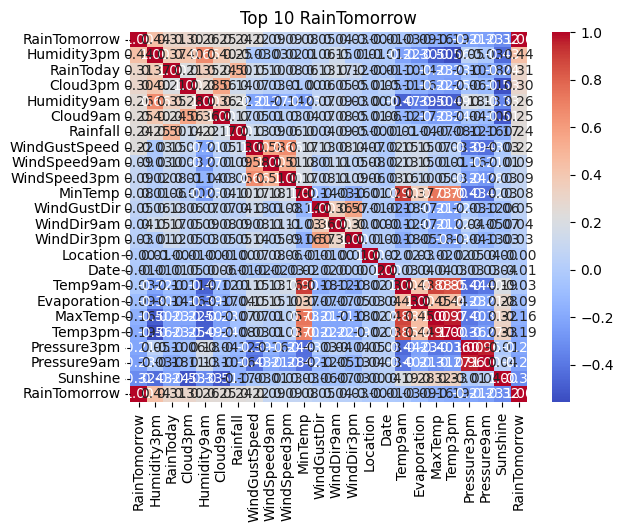

In [ ]:
df_corr = X.copy()
df_corr['RainTomorrow'] = y
correlations = df_corr.corr()['RainTomorrow'].sort_values(ascending=False)

plt.figure()
sns.heatmap(df_corr[correlations.index[1:11].tolist() + ['RainTomorrow']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Top 10 RainTomorrow')
plt.show()

In [18]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline as SkPipeline
from imblearn.pipeline import Pipeline as ImbPipeline 
#from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, precision_score, recall_score, f1_score
import os

In [19]:
y = df['RainTomorrow'].astype(int)

In [20]:
numeric_selector = make_column_selector(dtype_include=[np.number])  # type: ignore
categorical_selector = make_column_selector(dtype_include=['object', 'category'])  # type: ignore

numeric_pipeline = SkPipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_pipeline = SkPipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocess = ColumnTransformer(transformers=[
    ('num', numeric_pipeline, numeric_selector),
    ('cat', categorical_pipeline, categorical_selector)
])

In [21]:
def make_model_pipeline(estimator):
    return ImbPipeline(steps=[
        ('preprocess', preprocess),
        ('clf', estimator)
    ])

In [22]:
model_grid = {
    'svc_rbf': {
        'pipeline': make_model_pipeline(SVC(random_state=42)),
        'params': {
            'clf__C': [0.1, 1, 10],
            'clf__gamma': ['scale', 'auto']
        }
    },
    'logistic_regression': {
        'pipeline': make_model_pipeline(LogisticRegression(max_iter=200, n_jobs=-1)),
        'params': {
            'clf__penalty': ['l2', 'l1'],
            'clf__C': [0.01, 0.1, 1, 10],
            'clf__solver': ['liblinear', 'saga']
        }
    },
    'random_forest': {
        'pipeline': make_model_pipeline(RandomForestClassifier(random_state=42, n_jobs=-1)),
        'params': {
            'clf__n_estimators': [150, 300],
            'clf__max_depth': [None, 10, 20],
            'clf__min_samples_split': [2, 10],
            'clf__max_features': ['sqrt', 'log2']
        }
    },
    'gradient_boosting': {
        'pipeline': make_model_pipeline(GradientBoostingClassifier(random_state=42)),
        'params': {
            'clf__learning_rate': [0.01, 0.1],
            'clf__n_estimators': [150, 300],
            'clf__max_depth': [3, 5]
        }
    },
}

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
results = []

csv_path = os.path.join(
    "SimpleModelRandomSearch" , "model_results.csv"
)

for name, config in model_grid.items():
    print(f"\n=== {name.upper()} ===")

    search = RandomizedSearchCV(
        estimator=config['pipeline'],
        param_distributions=config['params'],
        scoring='f1',
        n_iter=5,
        cv=cv,
        n_jobs=1,
        verbose=1,
        random_state=42
    )

    search.fit(X_train, y_train)
    best_params = search.best_params_
    best_f1 = search.best_score_

    y_pred = search.best_estimator_.predict(X_test)  # type: ignore
    acc = accuracy_score(y_test, y_pred)  # type: ignore
    prec = precision_score(y_test, y_pred)  # type: ignore
    rec = recall_score(y_test, y_pred)  # type: ignore
    f1 = f1_score(y_test, y_pred)  # type: ignore

    print("Best params:", best_params)
    print("CV F1 Score:", round(best_f1, 4))
    print("Test Accuracy:", round(acc, 4))
    print("Test Precision:", round(prec, 4)) #type: ignore
    print("Test Recall:", round(rec, 4)) #type: ignore
    print("Test F1:", round(f1, 4)) #type: ignore

    all_params = {
        'model': name,
        'cv_f1': best_f1,
        'test_accuracy': acc,
        'test_precision': prec,
        'test_recall': rec,
        'test_f1': f1
    }
    
    for model_name in model_grid.keys():
        for p in model_grid[model_name]['params'].keys():
            all_params[p] = best_params.get(p, np.nan)

    results.append(all_params)
    partial_df = pd.DataFrame(results)
    if os.path.exists(csv_path):
        existing_df = pd.read_csv(csv_path)
        merged_df = pd.concat([existing_df, partial_df]).drop_duplicates(subset=['model'], keep='last')
        merged_df.to_csv(csv_path, index=False)
    else:
        partial_df.to_csv(csv_path, index=False)

    print(f"[/] Progress saved → {csv_path}")


results_df = pd.read_csv(csv_path)
best_row = results_df.loc[results_df['test_f1'].idxmax()]
print("\n>>> Best model overall:")
print(best_row)


=== SVC_RBF ===
Fitting 3 folds for each of 5 candidates, totalling 15 fits
